The purpose of this notebook is to generate the baseline for `test_sinogram` in the tests module. This test generates a 32x32p sinogram of a single right triangle and a circle with a hole in the center.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from xdesign import *

In [2]:
SIZE = 32

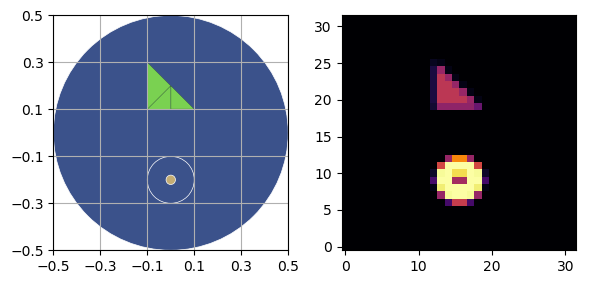

In [3]:
phan = XDesignDefault()
sidebyside(phan, SIZE)
plt.show()

In [4]:
theta, h = raster_scan2D(SIZE, SIZE)
prb = Probe(size=1/SIZE)
sino = prb.measure(phan, theta, h)
sino = -np.log(sino)

## Reference Generator

Generate two of the exact same sinogram. Save one for `nosetests`. Next, compare the two sinograms using `assert_allclose` to determine the smallest `absolute tolerance` that may be achieved.

In [5]:
np.save('test_sinogram.npy', sino, allow_pickle=True)

In [6]:
sino = prb.measure(phan, theta, h)
sino = -np.log(sino)
sino_reference = np.load('test_sinogram.npy')

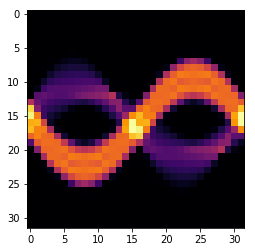

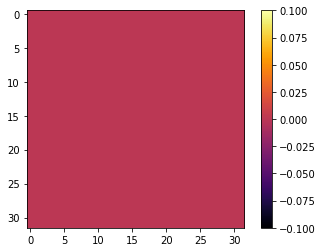

In [7]:
plt.figure()
plt.imshow(sino, cmap='inferno', interpolation='nearest')
plt.figure()
plt.imshow(sino-sino_reference, cmap='inferno', interpolation='nearest')
plt.colorbar()
plt.show()

np.testing.assert_equal(sino, sino_reference)